In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import meteostat
import pickle
import upsetplot

In [2]:
def calculate_shannon_diversity_from_proportions(abundance_array):
    """Calculate Shannon diversity index from an array of proportions."""
    # Filter out zero proportions to avoid log(0)
    filtered_abundance = abundance_array[abundance_array > 0]
    shannon_index = -np.sum(filtered_abundance * np.log(filtered_abundance))
    return shannon_index

In [3]:
transcriptome = pd.read_csv('/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv', index_col = 0)
rows_to_drop_expression_data = ['A2450525897_n01_undetermined',
                'A2449446903_n01_undetermined',
                'B250508004_n01_undetermined',
                'B2449500127_n01_undetermined']
transcriptome = transcriptome.drop(index = rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()


In [4]:
metadata = pd.read_csv('/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv', index_col = 0,)
metadata = metadata.drop(columns= ['arb.sort','sample-id','Ambiguous Unstranded','Ambiguous Forward','Multimapping','Unmapped Over Mapped'])
metadata['Date and Time'] = metadata['date'] +' ' +  metadata['time']
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata['Date and Time'] = pd.to_datetime(metadata['Date and Time'], format = luke_time_data_format)

In [5]:
unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",

]
borderline_unusable = ['A2450525897_n01_LICRNA01_F03', 'A2450525897_n01_LICRNA01_G07','A2449446903_n01_LICRNA02_A04','A2449446903_n01_LICRNA02_H10',"B2449500127_n01_LICRNA04_H02","B2449500127_n01_LICRNA04_H11"]
all_unsable = borderline_unusable+unusable_samples


In [6]:
trimmed_transcriptome = transcriptome.drop(index = all_unsable)
trimmed_metadata = metadata.drop(index= all_unsable)


In [7]:
long_term_transcriptome = trimmed_transcriptome.loc[trimmed_metadata['Experiment Type'] == 'Long Term']
long_term_metadata = trimmed_metadata.loc[trimmed_metadata['Experiment Type'] == 'Long Term']


In [8]:
groupby_timepoint = long_term_transcriptome.groupby(long_term_metadata['timepoint']).mean()
#groupby_timepoint = groupby_timepoint.loc[:, (groupby_timepoint  == 0).mean() < .5] ## At least half of timepoints are non zero (slighlty unintuitive because ==0 makes zeros 1)
groupby_timepoint = groupby_timepoint.loc[:, (groupby_timepoint  > 1).mean() > .5] ## At least half of timepoints bigger than 1
groupby_timepoint


,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ArthCt115,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp085
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,4.178007,5.437430,2.605825,4.439901,50.977363,13.004802,1.589169,9.734259,65.657436,1104.330609,...,5.059142,3.336826,43.520549,122.823875,8.980496,6.651848,21.939469,0.000000,0.161073,0.965547
t02,0.940355,7.298013,3.842908,4.463269,25.168823,47.655766,0.571242,12.908019,75.165515,845.754056,...,0.000000,6.497311,6.751200,130.786877,4.160837,0.244885,21.553952,3.428396,0.037675,1.325997
t03,1.783955,7.880381,4.144576,4.227300,46.778572,28.141387,3.471598,8.618715,69.239717,932.443238,...,0.000000,0.000000,10.900785,52.858647,5.848172,1.035596,6.500587,0.000000,2.156090,0.972086
t04,3.294595,7.674816,5.922081,5.006461,28.959007,39.972919,1.555315,13.910990,76.747498,1193.770144,...,0.000000,2.551425,6.978923,80.358859,0.000000,3.078758,19.860159,4.717444,4.191593,2.531536
t05,1.695050,6.069584,2.895225,3.362750,40.021234,10.213291,0.867596,8.622884,69.938324,1202.568221,...,1.585753,13.285471,19.211318,49.267266,2.607296,3.691827,10.404960,8.562370,1.142433,1.769217
t06,0.817885,5.963264,2.836390,2.420270,34.425932,8.355582,2.112976,13.958665,54.455711,1211.469894,...,0.892974,4.417069,13.454872,29.321538,13.028191,7.357152,5.552243,1.294320,3.633794,1.578309
t07,1.108656,6.329721,1.828056,3.699847,47.950309,6.811390,1.480485,11.036907,61.290810,1078.977322,...,1.148780,9.625153,12.268870,39.640506,4.836168,4.843796,7.371363,1.893213,3.312303,2.210424
t08,0.432387,4.034252,1.315234,2.412136,37.309378,12.520038,0.617279,11.512825,46.354285,540.282869,...,2.029913,5.147805,18.927096,76.691200,10.530133,7.631265,6.334308,3.134487,4.265254,2.934250
t09,0.892427,6.731354,1.876925,2.804225,38.215024,4.794368,1.310240,9.041800,46.638535,704.253630,...,5.692243,13.258177,8.966486,36.647809,11.555561,10.159008,6.338279,2.003623,2.928722,1.937635


In [9]:
microbiome_abundance = pd.read_csv('/Users/michael/Data/Luke_terrace_experiment/Microbiome/lic2024_16S_rab.csv')
long_term_microbiome = microbiome_abundance.merge(metadata[['sampID','Experiment Type']], left_on= 'plantID', right_on='sampID')
long_term_microbiome = long_term_microbiome.loc[long_term_microbiome['Experiment Type'] == 'Long Term']
long_term_microbiome

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
2,LIC159,plant,t14,1/23/24,8:00,LIC_02,83,LIC159,d__Bacteria,Cyanobacteriota,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,Caldora,Caldora sp010672925,60.5,LIC159,Long Term
4,LIC306,plant,t26,3/8/24,8:00,LIC_04,128,LIC306,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,57.2,LIC306,Long Term
5,LIC016,plant,t02,11/7/23,8:00,LIC_01,6,LIC016,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,54.4,LIC016,Long Term
9,LIC051,plant,t05,11/21/23,8:00,LIC_01,20,LIC051,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Neorhizobium_500197,Neorhizobium soli,49.7,LIC051,Long Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14044,LIC157,plant,t14,1/23/24,8:00,LIC_02,83,LIC157,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Propionibacteriaceae,Friedmanniella,Friedmanniella luteola,0.5,LIC157,Long Term
14046,LIC195,plant,t17,2/2/24,8:00,LIC_03,93,LIC195,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Propionibacteriaceae,Friedmanniella,Friedmanniella flava,0.5,LIC195,Long Term
14047,LIC122,plant,t11,12/15/23,8:00,LIC_02,44,LIC122,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 hankookensis,0.5,LIC122,Long Term
14048,LIC028,plant,t03,11/14/23,8:00,LIC_01,13,LIC028,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Modestobacter,Modestobacter muralis,0.5,LIC028,Long Term


In [10]:
long_term_microbiome.loc[long_term_microbiome['Sample'] == 'LIC063']

,Sample,sample.type,timepoint,date,time,platename,daysincestart,plantID,Kingdom,Phylum,Class,Order,Family,Genus,Species,AbundR100,sampID,Experiment Type
1,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 sp000786205,66.1,LIC063,Long Term
3467,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 dongxiaopingii,2.6,LIC063,Long Term
3706,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Pseudonocardiaceae,Actinomycetospora,Actinomycetospora chiangmaiensis,2.4,LIC063,Long Term
3808,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Kordiimonadaceae,Kordiimonas,Kordiimonas sp002401685,2.3,LIC063,Long Term
4049,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Mycobacteriales,Geodermatophilaceae,Klenkia,Klenkia sp001424455,2.2,LIC063,Long Term
5167,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Gammaproteobacteria,Pseudomonadales_A_650611,Pseudomonadaceae,Pseudomonas_E_647464,Pseudomonas_E_647464 avellanae,1.6,LIC063,Long Term
5254,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae_486827,Sphingomonas_L_486704,Sphingomonas_L_486704 yunnanensis,1.6,LIC063,Long Term
6093,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Pseudomonadota,Alphaproteobacteria,Rhizobiales_505101,Rhizobiaceae,Neorhizobium_500197,Neorhizobium soli,1.3,LIC063,Long Term
6226,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Actinomycetales,Microbacteriaceae,Microbacterium_A_383321,Microbacterium_A_383321 sp000333395,1.3,LIC063,Long Term
6473,LIC063,plant,t06,11/28/23,8:00,LIC_01,27,LIC063,d__Bacteria,Actinomycetota,Actinomycetes,Propionibacteriales,Nocardioidaceae,Nocardioides_A_392796,Nocardioides_A_392796 halotolerans,1.2,LIC063,Long Term


In [17]:
genus_sum = long_term_microbiome[['Sample','Order','AbundR100']].groupby(['Sample','Order']).sum()
genus_sum = genus_sum.reset_index()
genus_sum

,Sample,Order,AbundR100
0,LIC001,Actinomycetales,5.1
1,LIC001,Burkholderiales,12.8
2,LIC001,Caulobacterales,0.5
3,LIC001,Flavobacteriales_B_877923,1.4
4,LIC001,Mycobacteriales,8.6
...,...,...,...
2009,LIC368,Mycobacteriales,11.2
2010,LIC368,Propionibacteriales,4.8
2011,LIC368,Pseudomonadales_A_650611,2.6
2012,LIC368,Rhizobiales_505101,6.1


In [18]:
genus_sum_w_tp = genus_sum.merge(metadata[['sampID','timepoint']], left_on = 'Sample', right_on= 'sampID')
genus_sum_w_tp

,Sample,Order,AbundR100,sampID,timepoint
0,LIC001,Actinomycetales,5.1,LIC001,t01
1,LIC001,Burkholderiales,12.8,LIC001,t01
2,LIC001,Caulobacterales,0.5,LIC001,t01
3,LIC001,Flavobacteriales_B_877923,1.4,LIC001,t01
4,LIC001,Mycobacteriales,8.6,LIC001,t01
...,...,...,...,...,...
2009,LIC368,Mycobacteriales,11.2,LIC368,t08
2010,LIC368,Propionibacteriales,4.8,LIC368,t08
2011,LIC368,Pseudomonadales_A_650611,2.6,LIC368,t08
2012,LIC368,Rhizobiales_505101,6.1,LIC368,t08


In [19]:
genus_sum.set_index('Sample',drop = True,).index.difference(genus_sum_w_tp.set_index('Sample',drop = True).index) ## Difference is from the dropped samples (due to low quality RNA) which we dont' wanna drop here cause its DNA

Index([], dtype='object', name='Sample')

In [20]:
genus_sum_w_tp.head(40)

,Sample,Order,AbundR100,sampID,timepoint
0,LIC001,Actinomycetales,5.1,LIC001,t01
1,LIC001,Burkholderiales,12.8,LIC001,t01
2,LIC001,Caulobacterales,0.5,LIC001,t01
3,LIC001,Flavobacteriales_B_877923,1.4,LIC001,t01
4,LIC001,Mycobacteriales,8.6,LIC001,t01
5,LIC001,Propionibacteriales,7.8,LIC001,t01
6,LIC001,Pseudomonadales_A_650611,3.6,LIC001,t01
7,LIC001,Rhizobiales_505101,5.3,LIC001,t01
8,LIC001,Solirubrobacterales,0.7,LIC001,t01
9,LIC001,Sphingomonadales,36.5,LIC001,t01


In [21]:
all_present_genus = genus_sum_w_tp['Order'].unique()
all_present_genus

array(['Actinomycetales', 'Burkholderiales', 'Caulobacterales',
       'Flavobacteriales_B_877923', 'Mycobacteriales',
       'Propionibacteriales', 'Pseudomonadales_A_650611',
       'Rhizobiales_505101', 'Solirubrobacterales', 'Sphingomonadales',
       'Enterobacterales_737866', 'Streptosporangiales',
       'Pseudomonadales_A_650612', 'Motilibacterales', 'Cyanobacteriales',
       'Acetobacterales', 'Polyangiales', 'Chitinophagales',
       'Abditibacteriales', 'Streptomycetales_400645',
       'Bdellovibrionales', 'B-17B0'], dtype=object)

In [22]:
genus_sum_w_tp

,Sample,Order,AbundR100,sampID,timepoint
0,LIC001,Actinomycetales,5.1,LIC001,t01
1,LIC001,Burkholderiales,12.8,LIC001,t01
2,LIC001,Caulobacterales,0.5,LIC001,t01
3,LIC001,Flavobacteriales_B_877923,1.4,LIC001,t01
4,LIC001,Mycobacteriales,8.6,LIC001,t01
...,...,...,...,...,...
2009,LIC368,Mycobacteriales,11.2,LIC368,t08
2010,LIC368,Propionibacteriales,4.8,LIC368,t08
2011,LIC368,Pseudomonadales_A_650611,2.6,LIC368,t08
2012,LIC368,Rhizobiales_505101,6.1,LIC368,t08


In [23]:

## Need to fill in missing genus in every sample first
for sampID in genus_sum_w_tp['sampID'].unique():
    sampid_only_df = genus_sum_w_tp.loc[genus_sum_w_tp['sampID'] == sampID ]
    present_genus_in_samp = sampid_only_df['Order'].unique()
    difference_in_present_bacteria = list(set(all_present_genus) - set(present_genus_in_samp))
    current_time_point = sampid_only_df['timepoint'].iloc[0]
    empty_df_to_add = pd.DataFrame(columns = ['Sample','Order','AbundR100','sampID','timepoint'])
    empty_df_to_add['Order'] = difference_in_present_bacteria
    empty_df_to_add['Sample'] = sampID
    empty_df_to_add['AbundR100'] = 0
    empty_df_to_add['sampID'] = sampID
    empty_df_to_add['timepoint'] = current_time_point
    genus_sum_w_tp = pd.concat([genus_sum_w_tp,empty_df_to_add])
    


In [24]:
genus_sum_w_tp

,Sample,Order,AbundR100,sampID,timepoint
0,LIC001,Actinomycetales,5.1,LIC001,t01
1,LIC001,Burkholderiales,12.8,LIC001,t01
2,LIC001,Caulobacterales,0.5,LIC001,t01
3,LIC001,Flavobacteriales_B_877923,1.4,LIC001,t01
4,LIC001,Mycobacteriales,8.6,LIC001,t01
...,...,...,...,...,...
8,LIC368,Pseudomonadales_A_650612,0.0,LIC368,t08
9,LIC368,Cyanobacteriales,0.0,LIC368,t08
10,LIC368,Polyangiales,0.0,LIC368,t08
11,LIC368,Motilibacterales,0.0,LIC368,t08


In [26]:
timepoint_average_abundance = genus_sum_w_tp[["Order","timepoint","AbundR100"]].groupby(['Order','timepoint']).mean()
timepoint_average_abundance = timepoint_average_abundance.reset_index()
timepoint_average_abundance

,Order,timepoint,AbundR100
0,Abditibacteriales,t01,0.0
1,Abditibacteriales,t02,0.0
2,Abditibacteriales,t03,0.0
3,Abditibacteriales,t04,0.0
4,Abditibacteriales,t05,0.0
...,...,...,...
611,Streptosporangiales,t24,0.0
612,Streptosporangiales,t25,0.0
613,Streptosporangiales,t26,0.0
614,Streptosporangiales,t27,0.0


In [28]:
timepoint_cleaned_average_abundance = timepoint_average_abundance.copy()

In [29]:
for genus in timepoint_cleaned_average_abundance['Order'].unique():
    genus_df = timepoint_cleaned_average_abundance.loc[timepoint_cleaned_average_abundance['Order'] == genus]
    if sum(genus_df['AbundR100']>0) < 10:
        timepoint_cleaned_average_abundance = timepoint_cleaned_average_abundance.loc[timepoint_cleaned_average_abundance['Order'] != genus]



In [34]:
timepoint_all_species_abundance = timepoint_average_abundance.copy()

In [30]:
timepoint_cleaned_average_abundance

,Order,timepoint,AbundR100
56,Actinomycetales,t01,5.9625
57,Actinomycetales,t02,8.3250
58,Actinomycetales,t03,7.6875
59,Actinomycetales,t04,10.5375
60,Actinomycetales,t05,8.6125
...,...,...,...
555,Sphingomonadales,t24,36.6500
556,Sphingomonadales,t25,37.3625
557,Sphingomonadales,t26,40.1500
558,Sphingomonadales,t27,35.1750


In [24]:
#sns.scatterplot(data = timepoint_average_abundance, x = 'timepoint', y = 'AbundR100',)

In [32]:
timepoint_abundance_matrix = pd.pivot_table(timepoint_cleaned_average_abundance, values = 'AbundR100',index = 'timepoint', columns = 'Order')
timepoint_abundance_matrix

Order,Actinomycetales,Burkholderiales,Caulobacterales,Cyanobacteriales,Flavobacteriales_B_877923,Mycobacteriales,Polyangiales,Propionibacteriales,Pseudomonadales_A_650611,Rhizobiales_505101,Solirubrobacterales,Sphingomonadales
timepoint,,,,,,,,,,,,
t01,5.962500,16.950000,2.025000,0.000000,5.587500,2.887500,0.000000,5.562500,6.450000,12.525000,0.362500,28.437500
t02,8.325000,14.675000,0.512500,0.000000,1.862500,5.550000,0.000000,6.750000,4.687500,6.887500,0.475000,35.600000
t03,7.687500,15.575000,0.200000,0.125000,6.925000,5.650000,0.000000,4.275000,4.387500,10.462500,0.062500,32.925000
t04,10.537500,15.387500,0.000000,0.200000,4.887500,7.550000,0.000000,3.912500,5.712500,7.512500,0.275000,31.712500
t05,8.612500,6.012500,1.150000,0.000000,8.525000,6.500000,0.000000,6.775000,4.987500,20.012500,0.375000,23.487500
t06,3.287500,14.425000,0.512500,0.175000,4.550000,7.862500,0.062500,7.287500,4.650000,10.100000,0.287500,33.537500
t07,8.150000,26.175000,0.537500,0.000000,4.200000,6.900000,0.000000,3.400000,6.125000,3.512500,0.075000,28.375000
t08,4.950000,30.062500,0.362500,0.437500,9.087500,5.975000,0.000000,4.687500,4.825000,4.712500,0.062500,23.300000
t09,5.287500,25.612500,0.075000,5.450000,6.975000,6.837500,0.000000,3.225000,6.737500,9.537500,0.137500,21.125000


In [35]:
all_species_abundance_matrix = pd.pivot_table(timepoint_all_species_abundance, values = 'AbundR100',index = 'timepoint', columns = 'Order')
all_species_abundance_matrix

Order,Abditibacteriales,Acetobacterales,Actinomycetales,B-17B0,Bdellovibrionales,Burkholderiales,Caulobacterales,Chitinophagales,Cyanobacteriales,Enterobacterales_737866,...,Mycobacteriales,Polyangiales,Propionibacteriales,Pseudomonadales_A_650611,Pseudomonadales_A_650612,Rhizobiales_505101,Solirubrobacterales,Sphingomonadales,Streptomycetales_400645,Streptosporangiales
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,0.000000,0.000000,5.962500,0.0000,0.0000,16.950000,2.025000,0.0000,0.000000,0.2625,...,2.887500,0.000000,5.562500,6.450000,0.000,12.525000,0.362500,28.437500,0.000000,0.0000
t02,0.000000,0.000000,8.325000,0.0000,0.0000,14.675000,0.512500,0.0000,0.000000,0.0000,...,5.550000,0.000000,6.750000,4.687500,0.075,6.887500,0.475000,35.600000,0.000000,0.0625
t03,0.000000,0.000000,7.687500,0.0000,0.0000,15.575000,0.200000,0.0000,0.125000,0.0000,...,5.650000,0.000000,4.275000,4.387500,0.000,10.462500,0.062500,32.925000,0.000000,0.0625
t04,0.000000,0.000000,10.537500,0.0000,0.0000,15.387500,0.000000,0.0000,0.200000,0.0000,...,7.550000,0.000000,3.912500,5.712500,0.000,7.512500,0.275000,31.712500,0.000000,0.0000
t05,0.000000,0.075000,8.612500,0.0000,0.0000,6.012500,1.150000,0.0000,0.000000,0.0000,...,6.500000,0.000000,6.775000,4.987500,0.000,20.012500,0.375000,23.487500,0.000000,0.0750
t06,0.000000,0.000000,3.287500,0.0000,0.0000,14.425000,0.512500,0.0000,0.175000,0.0000,...,7.862500,0.062500,7.287500,4.650000,0.000,10.100000,0.287500,33.537500,0.000000,0.0000
t07,0.000000,0.000000,8.150000,0.0000,0.0000,26.175000,0.537500,0.0625,0.000000,0.0000,...,6.900000,0.000000,3.400000,6.125000,0.000,3.512500,0.075000,28.375000,0.000000,0.0000
t08,0.000000,0.000000,4.950000,0.0000,0.0000,30.062500,0.362500,0.0000,0.437500,0.1000,...,5.975000,0.000000,4.687500,4.825000,0.000,4.712500,0.062500,23.300000,0.000000,0.0000
t09,0.000000,0.075000,5.287500,0.0000,0.0000,25.612500,0.075000,0.0000,5.450000,0.0000,...,6.837500,0.000000,3.225000,6.737500,0.000,9.537500,0.137500,21.125000,0.000000,0.0000


In [36]:
groupby_timepoint

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ArthCt115,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp085
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,4.178007,5.437430,2.605825,4.439901,50.977363,13.004802,1.589169,9.734259,65.657436,1104.330609,...,5.059142,3.336826,43.520549,122.823875,8.980496,6.651848,21.939469,0.000000,0.161073,0.965547
t02,0.940355,7.298013,3.842908,4.463269,25.168823,47.655766,0.571242,12.908019,75.165515,845.754056,...,0.000000,6.497311,6.751200,130.786877,4.160837,0.244885,21.553952,3.428396,0.037675,1.325997
t03,1.783955,7.880381,4.144576,4.227300,46.778572,28.141387,3.471598,8.618715,69.239717,932.443238,...,0.000000,0.000000,10.900785,52.858647,5.848172,1.035596,6.500587,0.000000,2.156090,0.972086
t04,3.294595,7.674816,5.922081,5.006461,28.959007,39.972919,1.555315,13.910990,76.747498,1193.770144,...,0.000000,2.551425,6.978923,80.358859,0.000000,3.078758,19.860159,4.717444,4.191593,2.531536
t05,1.695050,6.069584,2.895225,3.362750,40.021234,10.213291,0.867596,8.622884,69.938324,1202.568221,...,1.585753,13.285471,19.211318,49.267266,2.607296,3.691827,10.404960,8.562370,1.142433,1.769217
t06,0.817885,5.963264,2.836390,2.420270,34.425932,8.355582,2.112976,13.958665,54.455711,1211.469894,...,0.892974,4.417069,13.454872,29.321538,13.028191,7.357152,5.552243,1.294320,3.633794,1.578309
t07,1.108656,6.329721,1.828056,3.699847,47.950309,6.811390,1.480485,11.036907,61.290810,1078.977322,...,1.148780,9.625153,12.268870,39.640506,4.836168,4.843796,7.371363,1.893213,3.312303,2.210424
t08,0.432387,4.034252,1.315234,2.412136,37.309378,12.520038,0.617279,11.512825,46.354285,540.282869,...,2.029913,5.147805,18.927096,76.691200,10.530133,7.631265,6.334308,3.134487,4.265254,2.934250
t09,0.892427,6.731354,1.876925,2.804225,38.215024,4.794368,1.310240,9.041800,46.638535,704.253630,...,5.692243,13.258177,8.966486,36.647809,11.555561,10.159008,6.338279,2.003623,2.928722,1.937635


In [37]:
full_correlation_matrix = groupby_timepoint.apply(lambda s: timepoint_abundance_matrix.corrwith(s,))
# dbfile_1 = open('/Users/michael/Data/Junk_data/gene_pearson_correlation_with_bacteria.p', 'ab')
# pickle.dump(full_correlation_matrix,dbfile_1)
# dbfile_1.close()

# dbfile_1 = open('/Users/michael/Data/Junk_data/gene_pearson_correlation_with_bacteria.p', 'rb')    
# full_correlation_matrix = pickle.load(dbfile_1)

In [29]:
# full_spearman_correlation_matrix = groupby_timepoint.apply(lambda s: timepoint_abundance_matrix.corrwith(s, method = 'spearman'))
# dbfile_2 = open('/Users/michael/Data/Junk_data/gene_spearman_correlation_with_bacteria.p', 'ab')
# pickle.dump(full_spearman_correlation_matrix,dbfile_2)
# dbfile_2.close()

dbfile_2 = open('/Users/michael/Data/Junk_data/gene_spearman_correlation_with_bacteria.p', 'rb')    
full_spearman_correlation_matrix = pickle.load(dbfile_2)

In [40]:
full_correlation_matrix

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ArthCt115,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp085
Order,,,,,,,,,,,,,,,,,,,,,
Actinomycetales,0.491937,0.522641,0.634053,0.514020,0.179973,0.346001,0.084689,0.359817,0.738212,0.667541,...,-0.103368,-0.104922,-0.123680,-0.060498,-0.182270,-0.279892,0.063320,-0.167753,-0.355016,-0.103179
Burkholderiales,-0.290745,-0.237996,-0.453154,-0.360866,-0.032137,-0.389508,-0.153105,0.020649,-0.339498,-0.276490,...,0.132457,0.114123,-0.051363,-0.117628,0.209213,0.240625,-0.268079,-0.106269,0.386481,0.149880
Caulobacterales,0.384221,-0.181986,-0.141186,0.073088,0.301189,-0.118815,-0.125938,-0.123323,0.142370,0.189840,...,0.240570,0.177797,0.544354,0.190368,0.023568,-0.083390,0.333892,-0.038822,-0.630025,-0.296117
Cyanobacteriales,0.051417,0.242256,0.063211,-0.086631,-0.015710,-0.269589,-0.158498,-0.336332,-0.102377,-0.224319,...,-0.155496,-0.045833,-0.123846,-0.218599,-0.126995,0.009994,-0.169988,-0.131358,0.158507,-0.052074
Flavobacteriales_B_877923,-0.236878,-0.481191,-0.464444,-0.434085,-0.341098,-0.355427,-0.202557,-0.495408,-0.624778,-0.410048,...,0.109473,0.206037,0.202855,0.155948,0.174612,0.376032,0.115986,0.254025,0.221754,0.030426
Mycobacteriales,-0.161000,0.337354,0.131840,0.109318,0.073133,0.154922,0.217556,0.205604,0.151015,0.143962,...,-0.155818,-0.140778,-0.280826,-0.131401,-0.035989,-0.325067,-0.106948,0.027115,0.117337,0.114809
Polyangiales,-0.194687,-0.152565,-0.297887,-0.056692,-0.203859,0.127817,-0.060996,-0.346149,-0.436924,-0.550122,...,0.066688,0.089326,0.327399,0.324080,0.099123,0.092306,0.465209,0.312281,-0.050240,0.174960
Propionibacteriales,0.129831,0.358598,0.283449,0.298497,0.294033,0.405624,0.249167,0.501981,0.544569,0.479989,...,-0.284179,-0.350603,-0.162372,-0.047777,-0.243015,-0.555242,-0.051748,-0.053444,-0.321094,-0.152906
Pseudomonadales_A_650611,0.015974,-0.172559,-0.166025,0.043864,-0.331835,-0.351483,-0.281552,0.020870,-0.111884,0.200042,...,0.193783,0.201620,0.113616,0.195204,0.110174,0.239690,-0.171078,-0.154553,0.093080,0.025971


In [42]:
full_correlation_matrix.index = full_correlation_matrix.index.str.replace(' ', '_')
full_correlation_matrix.columns = full_correlation_matrix.columns.str.replace(' ', '_')

In [50]:
top_200_spearman = np.array([full_correlation_matrix.T[c].nlargest(500).index.values for c in full_correlation_matrix.T])

In [51]:
top_200_spearman

array([['AT5G55670', 'AT3G13440', 'AT5G07180', ..., 'AT3G62290',
        'AT1G30290', 'AT5G51410'],
       ['AT1G51070', 'AT2G31141', 'AT4G04595', ..., 'AT3G16410',
        'AT1G24290', 'AT4G36250'],
       ['AT3G10815', 'AT5G05580', 'AT1G68440', ..., 'AT1G27330',
        'AT5G09830', 'AT5G46350'],
       ...,
       ['AT3G48700', 'AT4G08570', 'AT3G45980', ..., 'AT5G54060',
        'AT4G27760', 'AT3G50910'],
       ['AT4G27540', 'AT1G73710', 'AT1G09770', ..., 'AT1G60800',
        'AT1G12650', 'AT3G61790'],
       ['AT3G49580', 'AT5G16530', 'ArthCp074', ..., 'AT5G45170',
        'AT3G44630', 'AT5G49710']], shape=(12, 500), dtype=object)

In [52]:
keys = full_correlation_matrix.index


In [53]:
dictionary_for_upset_plot = dict(zip(keys,top_200_spearman))
dictionary_for_upset_plot


{'Actinomycetales': array(['AT5G55670', 'AT3G13440', 'AT5G07180', 'AT5G13890', 'AT3G09070',
        'AT4G25320', 'AT1G26180', 'AT1G15200', 'AT1G30880', 'AT5G40340',
        'AT2G36400', 'AT2G11910', 'AT1G55350', 'AT5G59460', 'AT5G24610',
        'AT2G16485', 'AT3G18035', 'AT3G51640', 'AT4G23840', 'AT1G21160',
        'AT1G20140', 'AT1G09815', 'AT2G01990', 'AT4G38900', 'AT2G30260',
        'AT3G17590', 'AT4G21110', 'AT1G69840', 'AT1G76810', 'AT1G15940',
        'AT2G20120', 'AT3G24810', 'AT4G25680', 'AT5G08450', 'AT2G22720',
        'AT2G37410', 'AT5G27640', 'AT1G32750', 'AT5G65410', 'AT5G49610',
        'AT5G63010', 'AT2G37400', 'AT3G58840', 'AT2G25670', 'AT2G47900',
        'AT1G09620', 'AT5G22730', 'AT3G63130', 'AT5G15520', 'AT5G59330',
        'AT1G79420', 'AT4G27120', 'AT2G33340', 'AT2G44010', 'AT5G67245',
        'AT1G75950', 'AT4G23060', 'AT1G14740', 'AT1G30230', 'AT5G18960',
        'AT1G52740', 'AT1G49890', 'AT5G20610', 'AT3G60880', 'AT1G10120',
        'AT5G10160', 'AT3G55390'

In [54]:
formatted_bacteria_data = upsetplot.from_contents(dictionary_for_upset_plot)
formatted_bacteria_data

id
Actinomycetales Burkholderiales Caulobacterales Cyanobacteriales Flavobacteriales_B_877923 Mycobacteriales Polyangiales Propionibacteriales Pseudomonadales_A_650611 Rhizobiales_505101 Solirubrobacterales Sphingomonadales           
True            False           False           False            False                     False           False        False               False                    False              False               False             AT5G55670
                                                                                           True            False        False               False                    False              False               False             AT3G13440
                                                                                           False           False        False               False                    False              False               False             AT5G07180
                                                                                                                                                                                                            False             AT5G13890
                                                                                                                                                                                                            False             AT3G09070
...                                                                                                                                                                                                                                 ...
False           False           False           False            False                     False           False        False               False                    False              False               True              AT5G02120
                                                                                                                                                                                                            True              AT1G69510
                                                                                                                                                                                                            True              AT3G44400
                                                                                                                                                                                                            True              AT4G15540
                                                                                                                                                                                                            True              AT5G45170

[4863 rows x 1 columns]

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

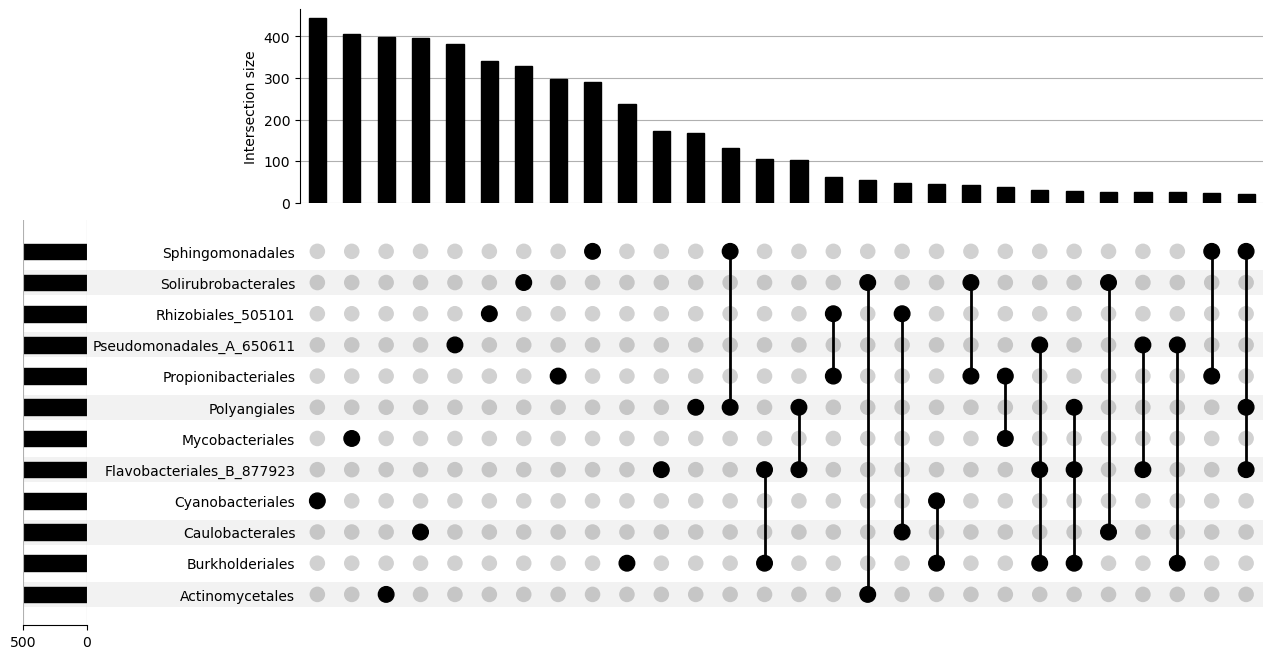

In [56]:
upsetplot.UpSet(formatted_bacteria_data, subset_size='count',min_subset_size=20, min_degree=1, sort_by="cardinality" ).plot()

In [ ]:
#full_correlation_matrix.idxmax( axis =1 )

Genus
Actinomycetospora              AT4G28020
Actinoplanes                   AT2G38995
Aeromicrobium                  AT2G04430
Aetherobacter                  ArthCp002
Agrobacterium                  AT5G46500
Amnibacterium_382409           AT2G22230
Aquabacterium_A_592457         AT3G46630
Aureimonas_A_501549            AT3G21670
Blastococcus                   AT2G21410
Brevundimonas                  AT5G63690
Caldora                        AT5G02575
Chryseobacterium_A_796612      AT4G17520
Curtobacterium                 AT1G55010
Curvibacter_587305             AT1G34245
Duganella_570715               AT5G06600
Flavobacterium                 AT1G04907
Friedmanniella                 AT3G06430
Frigoribacterium               AT1G61910
Geodermatophilus               AT1G49150
Herbaspirillum                 AT1G61000
Hylemonella                    AT4G10760
Janthinobacterium_571130       AT1G27340
Janthinobacterium_571526       AT2G30870
Kineococcus                    AT2G46900
Kineospori

In [28]:
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time
filename,,,,,,,,,,,,,,,,,
A2450525897_n01_LICRNA01_A01,A01,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,112554.0,A,1,2248661.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_B01,B01,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,226718.0,B,1,5984566.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_C01,C01,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,97848.0,C,1,2936453.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_D01,D01,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,49095.0,D,1,1359823.0,Long Term,November,0,2023-11-01 08:00:00
A2450525897_n01_LICRNA01_E01,E01,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,135512.0,E,1,2680737.0,Long Term,November,0,2023-11-01 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_D04,D04,LIC364,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3938079.0,607579.0,D,4,7492987.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_E04,E04,LIC365,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,2930881.0,411155.0,E,4,5576195.0,Long Term,December,34,2023-12-05 08:00:00
B250508004_n01_LICRNA03_F04,F04,LIC366,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3451594.0,558062.0,F,4,7678391.0,Long Term,December,34,2023-12-05 08:00:00


In [29]:
start_time = dt.datetime(2023,10,1)
end_time = dt.datetime(2024,4,30)
luke_apt_point = meteostat.Point(40.73005, -73.99450)
luke_hourly_data = meteostat.Hourly(luke_apt_point,start_time, end_time).fetch()

In [30]:
luke_rain_events = luke_hourly_data.loc[luke_hourly_data['prcp']>= .2]
luke_rain_events.index = pd.to_datetime(luke_rain_events.index)

In [31]:
list_of_time_since_rain = []
for time in long_term_metadata['Date and Time'].to_list():
    time_since_all_rain = time - luke_rain_events.index
    rain_events_in_past = luke_rain_events.loc[time_since_all_rain>= dt.timedelta(seconds =0)]
    time_of_last_rain = rain_events_in_past.index.max()
    time_since_last_rain = time-time_of_last_rain
    list_of_time_since_rain.append(time_since_last_rain)
    

In [32]:
long_term_metadata['Time Since Rain'] = list_of_time_since_rain

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
long_term_metadata

,plate.pos,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,No Feature,plate_row,plate_col,Total Reads,Experiment Type,Sample Month,daysincestart,Date and Time,Time Since Rain
filename,,,,,,,,,,,,,,,,,,
A2450525897_n01_LICRNA01_A01,A01,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,112554.0,A,1,2248661.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
A2450525897_n01_LICRNA01_B01,B01,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,226718.0,B,1,5984566.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
A2450525897_n01_LICRNA01_C01,C01,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,97848.0,C,1,2936453.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
A2450525897_n01_LICRNA01_D01,D01,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,49095.0,D,1,1359823.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
A2450525897_n01_LICRNA01_E01,E01,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,135512.0,E,1,2680737.0,Long Term,November,0,2023-11-01 08:00:00,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B250508004_n01_LICRNA03_D04,D04,LIC364,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3938079.0,607579.0,D,4,7492987.0,Long Term,December,34,2023-12-05 08:00:00,1 days 11:00:00
B250508004_n01_LICRNA03_E04,E04,LIC365,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,2930881.0,411155.0,E,4,5576195.0,Long Term,December,34,2023-12-05 08:00:00,1 days 11:00:00
B250508004_n01_LICRNA03_F04,F04,LIC366,plant,t08,12/5/23,8:00,LIC_04,LICRNA_03,3451594.0,558062.0,F,4,7678391.0,Long Term,December,34,2023-12-05 08:00:00,1 days 11:00:00


In [34]:
timepoint_time_since_rain = long_term_metadata[['timepoint', 'Time Since Rain']].drop_duplicates()
timepoint_time_since_rain = timepoint_time_since_rain.sort_values(by = 'timepoint')
timepoint_time_since_rain

,timepoint,Time Since Rain
filename,,
A2450525897_n01_LICRNA01_A01,t01,0 days 00:00:00
A2450525897_n01_LICRNA01_A02,t02,5 days 12:00:00
A2450525897_n01_LICRNA01_A03,t03,0 days 08:00:00
A2450525897_n01_LICRNA01_A04,t04,3 days 08:00:00
A2450525897_n01_LICRNA01_A05,t05,2 days 22:00:00
A2450525897_n01_LICRNA01_B06,t06,1 days 02:00:00
A2450525897_n01_LICRNA01_A07,t07,4 days 02:00:00
B250508004_n01_LICRNA03_A04,t08,1 days 11:00:00
A2450525897_n01_LICRNA01_B08,t09,4 days 11:00:00


In [35]:
timepoint_time_since_rain['Hours Since Rain'] = timepoint_time_since_rain['Time Since Rain']/pd.Timedelta(hours = 1)
timepoint_time_since_rain = timepoint_time_since_rain.set_index('timepoint', drop = True)
timepoint_time_since_rain

,Time Since Rain,Hours Since Rain
timepoint,,
t01,0 days 00:00:00,0.0
t02,5 days 12:00:00,132.0
t03,0 days 08:00:00,8.0
t04,3 days 08:00:00,80.0
t05,2 days 22:00:00,70.0
t06,1 days 02:00:00,26.0
t07,4 days 02:00:00,98.0
t08,1 days 11:00:00,35.0
t09,4 days 11:00:00,107.0


In [36]:
rain_correlation_with_abundance = timepoint_abundance_matrix.corrwith(timepoint_time_since_rain['Hours Since Rain'],method='spearman')

In [37]:
timepoint_abundance_matrix

Genus,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agrobacterium,Amnibacterium_382409,Aquabacterium_A_592457,Aureimonas_A_501549,Blastococcus,Brevundimonas,...,Pseudomonas_E_647464,Pseudonocardia,Ramlibacter_588642,Rathayibacter,Rhodoferax_C,Rugamonas_570800,Solirubrobacter,Sphingomonas_L_486704,Telluria_573210,Variovorax
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,0.375000,0.137500,0.7875,0.000000,0.000000,0.062500,0.137500,0.950000,0.662500,1.775000,...,2.087500,0.0000,0.950000,0.062500,3.537500,0.225000,0.362500,27.112500,1.675000,2.362500
t02,0.587500,0.712500,0.3125,0.000000,0.250000,0.112500,0.450000,0.087500,1.400000,0.150000,...,2.337500,0.2125,0.000000,0.062500,2.412500,0.262500,0.475000,33.262500,3.075000,0.737500
t03,0.600000,0.450000,0.1500,0.000000,0.350000,0.150000,0.000000,0.075000,0.275000,0.200000,...,1.662500,0.0625,0.000000,0.687500,3.987500,0.425000,0.062500,30.150000,1.425000,1.800000
t04,0.300000,0.000000,0.1625,0.000000,0.387500,0.200000,0.000000,0.350000,0.875000,0.000000,...,3.825000,0.0000,0.000000,0.462500,3.062500,0.862500,0.275000,28.800000,0.912500,0.950000
t05,0.337500,0.575000,0.0000,0.000000,0.600000,0.812500,0.187500,0.650000,0.637500,1.025000,...,2.650000,0.2750,0.000000,0.062500,2.425000,0.137500,0.100000,21.312500,0.837500,0.637500
t06,0.775000,1.262500,0.6125,0.062500,0.175000,0.175000,0.100000,0.675000,0.112500,0.512500,...,3.812500,0.0000,0.600000,0.087500,3.825000,0.300000,0.162500,29.712500,0.775000,2.612500
t07,0.362500,0.287500,0.0000,0.000000,0.212500,0.087500,0.000000,0.250000,1.162500,0.537500,...,4.300000,0.0000,0.250000,0.537500,2.787500,5.550000,0.075000,25.412500,4.862500,0.875000
t08,0.725000,0.312500,0.0625,0.000000,0.125000,0.200000,0.000000,1.650000,0.200000,0.362500,...,4.587500,0.1125,0.200000,0.162500,5.150000,2.912500,0.000000,18.987500,0.700000,2.012500
t09,0.212500,0.062500,0.1375,0.000000,0.487500,0.075000,0.062500,0.087500,0.325000,0.000000,...,5.575000,0.0000,0.062500,0.362500,5.637500,1.062500,0.075000,17.237500,1.500000,0.975000


In [ ]:
timepoint_time_since_rain

,Time Since Rain,Hours Since Rain
timepoint,,
t01,0 days 00:00:00,0.0
t02,5 days 12:00:00,132.0
t03,0 days 08:00:00,8.0
t04,3 days 08:00:00,80.0
t05,2 days 22:00:00,70.0
t06,1 days 02:00:00,26.0
t07,4 days 02:00:00,98.0
t08,1 days 11:00:00,35.0
t09,4 days 11:00:00,107.0


In [39]:
timepoint_abundance_matrix

Genus,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agrobacterium,Amnibacterium_382409,Aquabacterium_A_592457,Aureimonas_A_501549,Blastococcus,Brevundimonas,...,Pseudomonas_E_647464,Pseudonocardia,Ramlibacter_588642,Rathayibacter,Rhodoferax_C,Rugamonas_570800,Solirubrobacter,Sphingomonas_L_486704,Telluria_573210,Variovorax
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,0.375000,0.137500,0.7875,0.000000,0.000000,0.062500,0.137500,0.950000,0.662500,1.775000,...,2.087500,0.0000,0.950000,0.062500,3.537500,0.225000,0.362500,27.112500,1.675000,2.362500
t02,0.587500,0.712500,0.3125,0.000000,0.250000,0.112500,0.450000,0.087500,1.400000,0.150000,...,2.337500,0.2125,0.000000,0.062500,2.412500,0.262500,0.475000,33.262500,3.075000,0.737500
t03,0.600000,0.450000,0.1500,0.000000,0.350000,0.150000,0.000000,0.075000,0.275000,0.200000,...,1.662500,0.0625,0.000000,0.687500,3.987500,0.425000,0.062500,30.150000,1.425000,1.800000
t04,0.300000,0.000000,0.1625,0.000000,0.387500,0.200000,0.000000,0.350000,0.875000,0.000000,...,3.825000,0.0000,0.000000,0.462500,3.062500,0.862500,0.275000,28.800000,0.912500,0.950000
t05,0.337500,0.575000,0.0000,0.000000,0.600000,0.812500,0.187500,0.650000,0.637500,1.025000,...,2.650000,0.2750,0.000000,0.062500,2.425000,0.137500,0.100000,21.312500,0.837500,0.637500
t06,0.775000,1.262500,0.6125,0.062500,0.175000,0.175000,0.100000,0.675000,0.112500,0.512500,...,3.812500,0.0000,0.600000,0.087500,3.825000,0.300000,0.162500,29.712500,0.775000,2.612500
t07,0.362500,0.287500,0.0000,0.000000,0.212500,0.087500,0.000000,0.250000,1.162500,0.537500,...,4.300000,0.0000,0.250000,0.537500,2.787500,5.550000,0.075000,25.412500,4.862500,0.875000
t08,0.725000,0.312500,0.0625,0.000000,0.125000,0.200000,0.000000,1.650000,0.200000,0.362500,...,4.587500,0.1125,0.200000,0.162500,5.150000,2.912500,0.000000,18.987500,0.700000,2.012500
t09,0.212500,0.062500,0.1375,0.000000,0.487500,0.075000,0.062500,0.087500,0.325000,0.000000,...,5.575000,0.0000,0.062500,0.362500,5.637500,1.062500,0.075000,17.237500,1.500000,0.975000


In [42]:
column

'Actinomycetospora'

In [53]:
list_of_diversity = []
for row in all_species_abundance_matrix.index:
    bacteria = (all_species_abundance_matrix.loc[row])/100
    shannon_diversity = calculate_shannon_diversity_from_proportions(bacteria)
    list_of_diversity.append(shannon_diversity)
diversity_series = pd.Series(list_of_diversity, index = all_species_abundance_matrix.index) 

In [55]:
diversity_series

timepoint
t01    2.693299
t02    2.516139
t03    2.568882
t04    2.542158
t05    2.552712
t06    2.545644
t07    2.706068
t08    2.768285
t09    2.913180
t10    2.569225
t11    2.649545
t12    2.713518
t13    2.601510
t14    2.582397
t15    2.559708
t16    2.484967
t17    2.303162
t18    2.455266
t19    2.461114
t20    2.517215
t21    2.431116
t22    2.365147
t23    2.262996
t24    2.247076
t25    2.333771
t26    2.130014
t27    2.317101
t28    2.394910
dtype: float64

In [58]:
pd.DataFrame(diversity_series).corrwith(timepoint_time_since_rain['Hours Since Rain'],method='spearman')

0    0.275777
dtype: float64

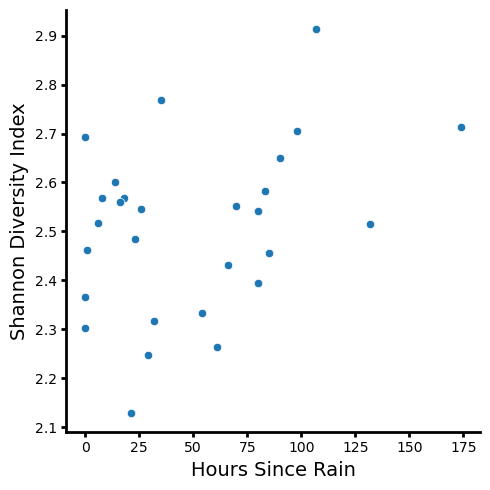

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(x = timepoint_time_since_rain['Hours Since Rain'], y = diversity_series)
plt.xlabel('Hours Since Rain', fontsize=14)
plt.ylabel('Shannon Diversity Index', fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
#ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=10, ) #rotation=90
plt.yticks(fontsize=10)
#plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

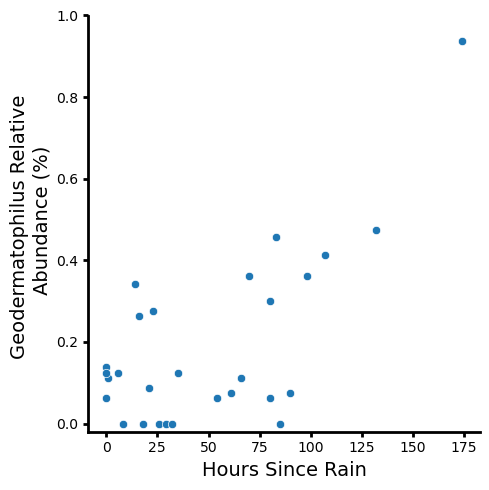

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(x = timepoint_time_since_rain['Hours Since Rain'], y = timepoint_abundance_matrix['Geodermatophilus'])
plt.xlabel('Hours Since Rain', fontsize=14)
plt.ylabel('Geodermatophilus Relative \n Abundance (%)', fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
#ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=10, ) #rotation=90
plt.yticks(fontsize=10)
plt.ylim(-.02,1)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')


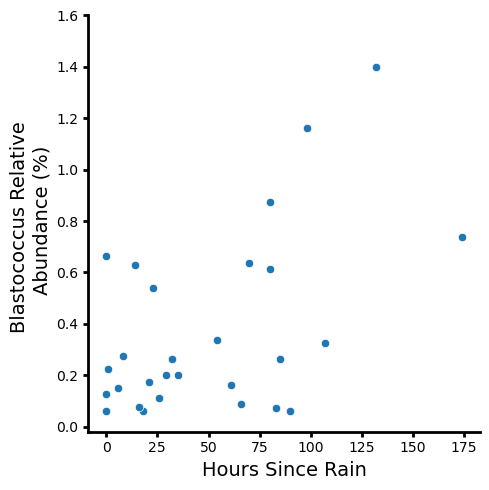

In [75]:

fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(x = timepoint_time_since_rain['Hours Since Rain'], y = timepoint_abundance_matrix['Blastococcus'])
plt.xlabel('Hours Since Rain', fontsize=14)
plt.ylabel('Blastococcus Relative \n Abundance (%)', fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
#ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=10, ) #rotation=90
plt.yticks(fontsize=10)
plt.ylim(-.02,1.6)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

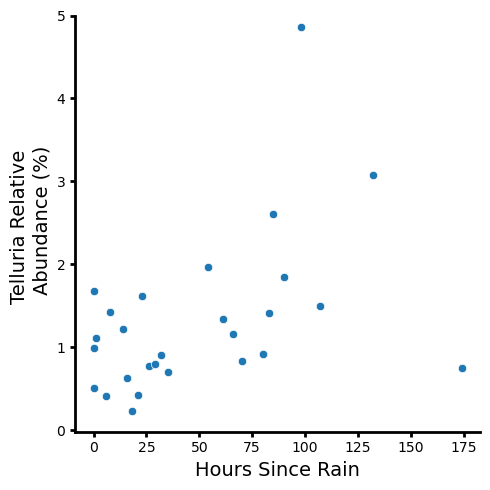

In [77]:


fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(x = timepoint_time_since_rain['Hours Since Rain'], y = timepoint_abundance_matrix['Telluria_573210'])
plt.xlabel('Hours Since Rain', fontsize=14)
plt.ylabel('Telluria Relative \n Abundance (%)', fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
#ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=10, ) #rotation=90
plt.yticks(fontsize=10)
plt.ylim(-.02,5)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

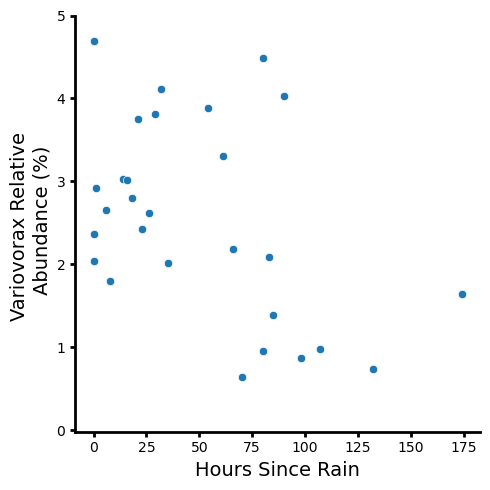

In [79]:

fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(x = timepoint_time_since_rain['Hours Since Rain'], y = timepoint_abundance_matrix['Variovorax'])
plt.xlabel('Hours Since Rain', fontsize=14)
plt.ylabel('Variovorax Relative \n Abundance (%)', fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
#ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=10, ) #rotation=90
plt.yticks(fontsize=10)
plt.ylim(-.02,5)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

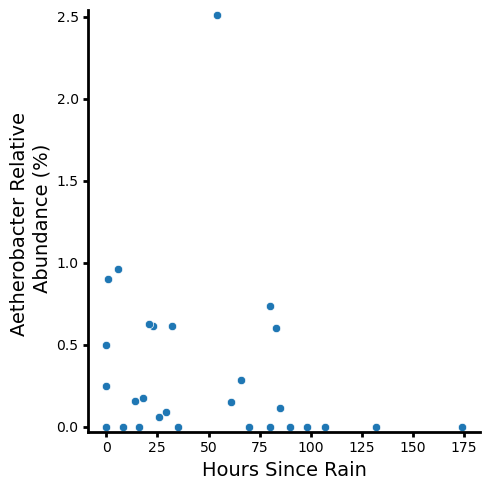

In [84]:


fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(x = timepoint_time_since_rain['Hours Since Rain'], y = timepoint_abundance_matrix['Aetherobacter'])
plt.xlabel('Hours Since Rain', fontsize=14)
plt.ylabel('Aetherobacter Relative \n Abundance (%)', fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
#ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=10, ) #rotation=90
plt.yticks(fontsize=10)
plt.ylim(-.03,2.54)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

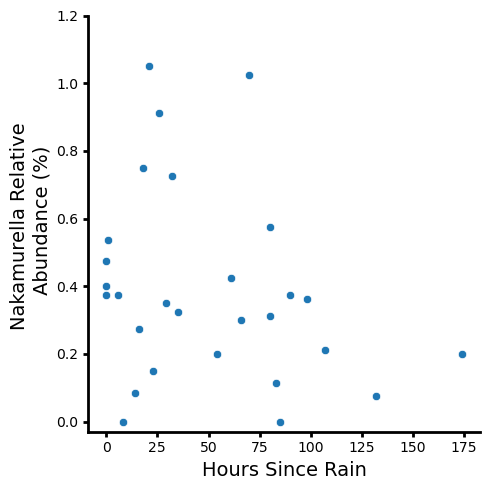

In [85]:


fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor("white")
ax = sns.scatterplot(x = timepoint_time_since_rain['Hours Since Rain'], y = timepoint_abundance_matrix['Nakamurella'])
plt.xlabel('Hours Since Rain', fontsize=14)
plt.ylabel('Nakamurella Relative \n Abundance (%)', fontsize=14)
sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
ax.spines["bottom"].set_color("black")
ax.spines["bottom"].set_linewidth(2)
ax.spines["left"].set_color("black")
ax.spines["left"].set_linewidth(2)
ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
#ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=10, ) #rotation=90
plt.yticks(fontsize=10)
plt.ylim(-.03,1.2)
plt.tight_layout()
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line], 
#      full_meta_data['plate.pos'][line], horizontalalignment='left', 
#      size='medium', color='black', weight='semibold')

In [ ]:
Nakamurella

In [34]:
rain_correlation_with_abundance

Genus
Actinomycetospora              0.071252
Actinoplanes                   0.080685
Aeromicrobium                 -0.189312
Aetherobacter                 -0.365604
Agrobacterium                 -0.054939
Amnibacterium_382409           0.228317
Aquabacterium_A_592457         0.206633
Aureimonas_A_501549           -0.182852
Blastococcus                   0.356859
Brevundimonas                  0.008772
Caldora                        0.133723
Chryseobacterium_A_796612      0.109604
Curtobacterium                 0.341409
Curvibacter_587305             0.214210
Duganella_570715               0.169101
Flavobacterium                -0.247296
Friedmanniella                 0.183662
Frigoribacterium               0.272765
Geodermatophilus               0.357404
Herbaspirillum                -0.082292
Hylemonella                   -0.025363
Janthinobacterium_571130       0.187295
Janthinobacterium_571526       0.311033
Kineococcus                    0.120241
Kineosporia                   -0.0

In [39]:
rain_correlation_with_genes_pearson = groupby_timepoint.corrwith(timepoint_time_since_rain['Hours Since Rain'],)

In [40]:
rain_correlation_with_genes_pearson.sort_values(ascending= False).head(30)

AT4G28230    0.688945
AT3G10930    0.662156
AT5G43680    0.653021
AT4G39570    0.652149
AT5G39380    0.640584
AT4G24570    0.619019
AT5G57560    0.615598
AT5G20450    0.606900
AT5G11610    0.604429
AT1G67470    0.603214
AT4G13395    0.598751
AT3G44260    0.596455
AT5G15980    0.596441
AT1G18670    0.595070
AT3G58540    0.593425
AT3G28340    0.591003
AT4G18880    0.589308
AT3G46600    0.589024
AT2G17730    0.586570
AT3G16720    0.585286
AT1G30760    0.584452
AT1G16825    0.581312
AT4G22745    0.577735
AT1G13460    0.574879
AT5G22790    0.574704
AT3G16330    0.574619
AT1G21130    0.572939
AT3G16280    0.568690
AT5G01270    0.567920
AT4G24015    0.567059
dtype: float64

In [41]:
rain_correlation_with_genes_spearman = groupby_timepoint.corrwith(timepoint_time_since_rain['Hours Since Rain'],method='spearman')

In [ ]:
rain_correlation_with_genes_spearman.sort_values(ascending= False).head(30)

AT3G15650    0.567986
AT5G64310    0.558127
AT1G67470    0.553745
AT5G39380    0.526085
AT5G58330    0.520060
AT4G28230    0.512666
AT2G16770    0.511845
AT1G30760    0.509654
AT1G18670    0.509654
AT3G10930    0.503903
AT1G01920    0.501438
AT1G79970    0.499247
AT2G17730    0.497056
AT5G65920    0.496782
AT3G58540    0.495139
AT3G21510    0.492127
AT2G25355    0.490483
AT3G27320    0.489114
AT5G53570    0.488840
AT5G24030    0.485006
AT3G10985    0.483363
AT1G07220    0.481446
AT3G59390    0.479255
AT4G29150    0.479255
AT3G05490    0.478434
AT2G17580    0.477886
AT4G22745    0.476790
AT1G52690    0.476243
AT5G35560    0.471861
AT3G16330    0.468301
dtype: float64

In [41]:
timepoint_abundance_matrix

Genus,Actinomycetospora,Actinoplanes,Aeromicrobium,Aetherobacter,Agrobacterium,Amnibacterium_382409,Aquabacterium_A_592457,Aureimonas_A_501549,Blastococcus,Brevundimonas,...,Pseudomonas_E_647464,Pseudonocardia,Ramlibacter_588642,Rathayibacter,Rhodoferax_C,Rugamonas_570800,Solirubrobacter,Sphingomonas_L_486704,Telluria_573210,Variovorax
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,0.375000,0.137500,0.7875,0.000000,0.000000,0.062500,0.137500,0.950000,0.662500,1.775000,...,2.087500,0.0000,0.950000,0.062500,3.537500,0.225000,0.362500,27.112500,1.675000,2.362500
t02,0.587500,0.712500,0.3125,0.000000,0.250000,0.112500,0.450000,0.087500,1.400000,0.150000,...,2.337500,0.2125,0.000000,0.062500,2.412500,0.262500,0.475000,33.262500,3.075000,0.737500
t03,0.600000,0.450000,0.1500,0.000000,0.350000,0.150000,0.000000,0.075000,0.275000,0.200000,...,1.662500,0.0625,0.000000,0.687500,3.987500,0.425000,0.062500,30.150000,1.425000,1.800000
t04,0.300000,0.000000,0.1625,0.000000,0.387500,0.200000,0.000000,0.350000,0.875000,0.000000,...,3.825000,0.0000,0.000000,0.462500,3.062500,0.862500,0.275000,28.800000,0.912500,0.950000
t05,0.337500,0.575000,0.0000,0.000000,0.600000,0.812500,0.187500,0.650000,0.637500,1.025000,...,2.650000,0.2750,0.000000,0.062500,2.425000,0.137500,0.100000,21.312500,0.837500,0.637500
t06,0.775000,1.262500,0.6125,0.062500,0.175000,0.175000,0.100000,0.675000,0.112500,0.512500,...,3.812500,0.0000,0.600000,0.087500,3.825000,0.300000,0.162500,29.712500,0.775000,2.612500
t07,0.362500,0.287500,0.0000,0.000000,0.212500,0.087500,0.000000,0.250000,1.162500,0.537500,...,4.300000,0.0000,0.250000,0.537500,2.787500,5.550000,0.075000,25.412500,4.862500,0.875000
t08,0.725000,0.312500,0.0625,0.000000,0.125000,0.200000,0.000000,1.650000,0.200000,0.362500,...,4.587500,0.1125,0.200000,0.162500,5.150000,2.912500,0.000000,18.987500,0.700000,2.012500
t09,0.212500,0.062500,0.1375,0.000000,0.487500,0.075000,0.062500,0.087500,0.325000,0.000000,...,5.575000,0.0000,0.062500,0.362500,5.637500,1.062500,0.075000,17.237500,1.500000,0.975000


In [42]:
groupby_timepoint

,AT1G01010,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,...,ArthCt115,ArthCr091,ArthCr090,ArthCr089,ArthCt114,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp085
timepoint,,,,,,,,,,,,,,,,,,,,,
t01,4.178007,5.437430,2.605825,4.439901,50.977363,13.004802,1.589169,9.734259,65.657436,1104.330609,...,5.059142,3.336826,43.520549,122.823875,8.980496,6.651848,21.939469,0.000000,0.161073,0.965547
t02,0.940355,7.298013,3.842908,4.463269,25.168823,47.655766,0.571242,12.908019,75.165515,845.754056,...,0.000000,6.497311,6.751200,130.786877,4.160837,0.244885,21.553952,3.428396,0.037675,1.325997
t03,1.783955,7.880381,4.144576,4.227300,46.778572,28.141387,3.471598,8.618715,69.239717,932.443238,...,0.000000,0.000000,10.900785,52.858647,5.848172,1.035596,6.500587,0.000000,2.156090,0.972086
t04,3.294595,7.674816,5.922081,5.006461,28.959007,39.972919,1.555315,13.910990,76.747498,1193.770144,...,0.000000,2.551425,6.978923,80.358859,0.000000,3.078758,19.860159,4.717444,4.191593,2.531536
t05,1.695050,6.069584,2.895225,3.362750,40.021234,10.213291,0.867596,8.622884,69.938324,1202.568221,...,1.585753,13.285471,19.211318,49.267266,2.607296,3.691827,10.404960,8.562370,1.142433,1.769217
t06,0.817885,5.963264,2.836390,2.420270,34.425932,8.355582,2.112976,13.958665,54.455711,1211.469894,...,0.892974,4.417069,13.454872,29.321538,13.028191,7.357152,5.552243,1.294320,3.633794,1.578309
t07,1.108656,6.329721,1.828056,3.699847,47.950309,6.811390,1.480485,11.036907,61.290810,1078.977322,...,1.148780,9.625153,12.268870,39.640506,4.836168,4.843796,7.371363,1.893213,3.312303,2.210424
t08,0.432387,4.034252,1.315234,2.412136,37.309378,12.520038,0.617279,11.512825,46.354285,540.282869,...,2.029913,5.147805,18.927096,76.691200,10.530133,7.631265,6.334308,3.134487,4.265254,2.934250
t09,0.892427,6.731354,1.876925,2.804225,38.215024,4.794368,1.310240,9.041800,46.638535,704.253630,...,5.692243,13.258177,8.966486,36.647809,11.555561,10.159008,6.338279,2.003623,2.928722,1.937635


In [ ]:
type(timepoint_time_since_rain['Time Since Rain'][4])

In [ ]:
timepoint_time_since_rain['Time Since Rain'].days

In [ ]:
len(list_of_time_since_rain)

In [ ]:
rain_events_in_past.index.max()

In [ ]:
time_since_all_rain >= dt.timedelta(seconds = 0)

In [ ]:
luke_rain_events.index[0]

In [ ]:
- 


In [ ]:
time_delta = luke_rain_events.index[0] - long_term_metadata['Date and Time'].iloc[0] 

In [ ]:
time_delta

In [ ]:
time_delta > dt.timedelta(seconds = 0)